In [1]:
# System 
import sys, os
import warnings
from tqdm.autonotebook import tqdm
sys.path.append('//Users//KattPaint//Desktop//DATASCI266//Modern-Time-Series-Forecasting-with-Python')
from src.utils.general import LogTime

# Data Manipulation 
import pandas as pd
import numpy as np 
import math
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

# Visualization 
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.graph_objects as go
from itertools import cycle
import seaborn as sns

# Modeling
from statsmodels.tsa.seasonal import seasonal_decompose
from src.transforms.target_transformations import AutoStationaryTransformer


# Global Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/var/folders/f6/7fg5p95n44sd8qk792nr68d40000gn/T/ipykernel_69913/600399243.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import Data

In [42]:
data = pd.read_csv('../data/monthly_target_economic_factors.csv')
data = data.rename({'Unnamed: 0':'time_index'}, axis=1)
data = data.set_index('time_index')
data.index = pd.to_datetime(data.index)
data.index.freq = 'MS'
data.head()

,t10yr,cpi,unemp,ppi,saving,month
time_index,,,,,,
1970-01-01,7.79,0.27,3.90,36.50,11.80,1
1970-02-01,7.24,0.53,4.20,36.70,11.70,2
1970-03-01,7.07,0.53,4.40,36.70,12.40,3
1970-04-01,7.39,0.79,4.60,36.80,13.30,4
1970-05-01,7.91,0.26,4.80,36.80,12.40,5


# Dealing with Non-Stationarity 

In [43]:
# define variables 
freq = 'MS'
ma_window = 12
seasonal_periods = 12

transformer_pipelines = {}
auto_stationary = AutoStationaryTransformer(seasonal_period=seasonal_periods)
y = data[["t10yr"]]
y_stat = auto_stationary.fit_transform(y, freq=freq)
data.loc[:, ["t10yr_stat"]] = y_stat.values
transformer_pipelines.update({'add_stationary':auto_stationary})

In [44]:
data.head()

,t10yr,cpi,unemp,ppi,saving,month,t10yr_stat
time_index,,,,,,,
1970-01-01,7.79,0.27,3.90,36.50,11.80,1,1.53
1970-02-01,7.24,0.53,4.20,36.70,11.70,2,1.35
1970-03-01,7.07,0.53,4.40,36.70,12.40,3,1.29
1970-04-01,7.39,0.79,4.60,36.80,13.30,4,1.41
1970-05-01,7.91,0.26,4.80,36.80,12.40,5,1.58


# Understanding Seasonality

Text(0, 0.5, 'Remainder')

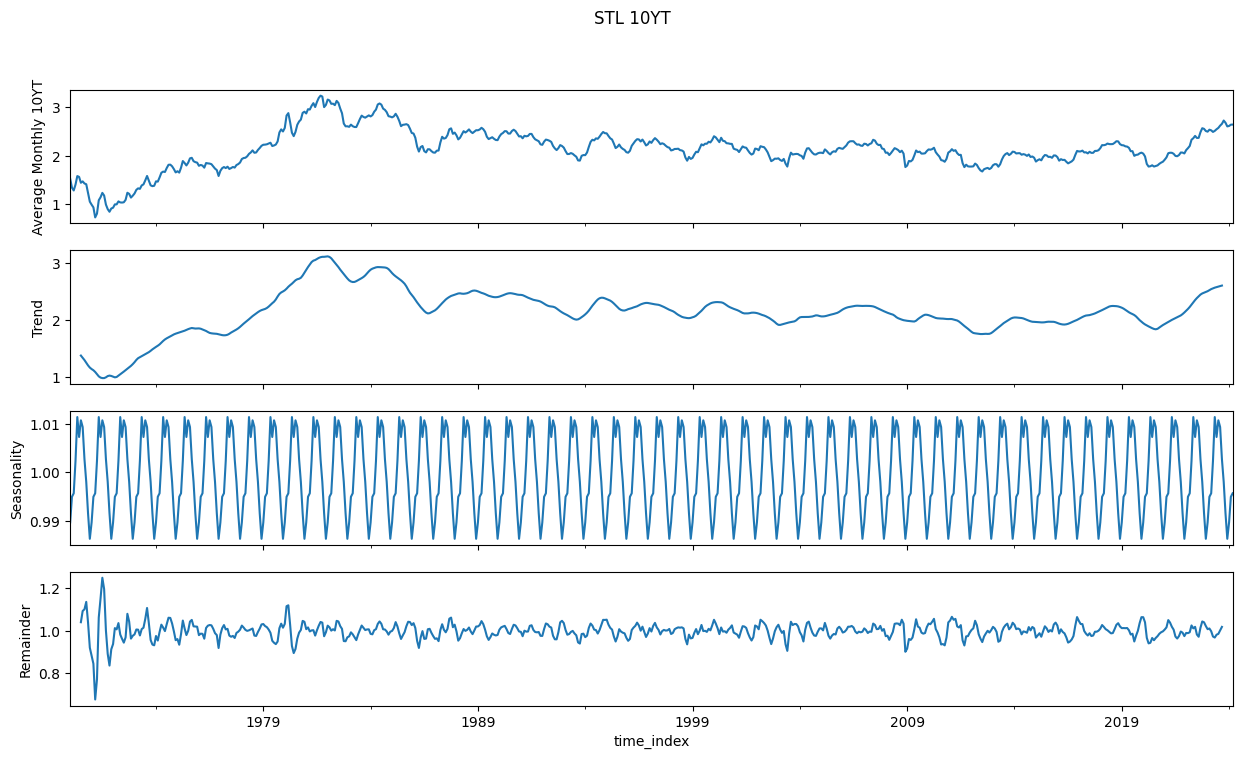

In [45]:
# subset stat 
df_rr = data[['t10yr_stat']]

# decompistion pretty graph
res = seasonal_decompose(df_rr, model="multiplicative")

fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8), sharex=True)
fig.suptitle('STL 10YT')

# observed 
res.observed.plot(ax=ax0)
ax0.set_ylabel("Average Monthly 10YT")

# trend
res.trend.plot(ax=ax1)
ax1.set_ylabel("Trend")

# seasonality 
res.seasonal.plot(ax=ax2)
ax2.set_ylabel("Seasonality")

# residuals 
res.resid.plot(ax=ax3)
ax3.set_ylabel("Remainder")

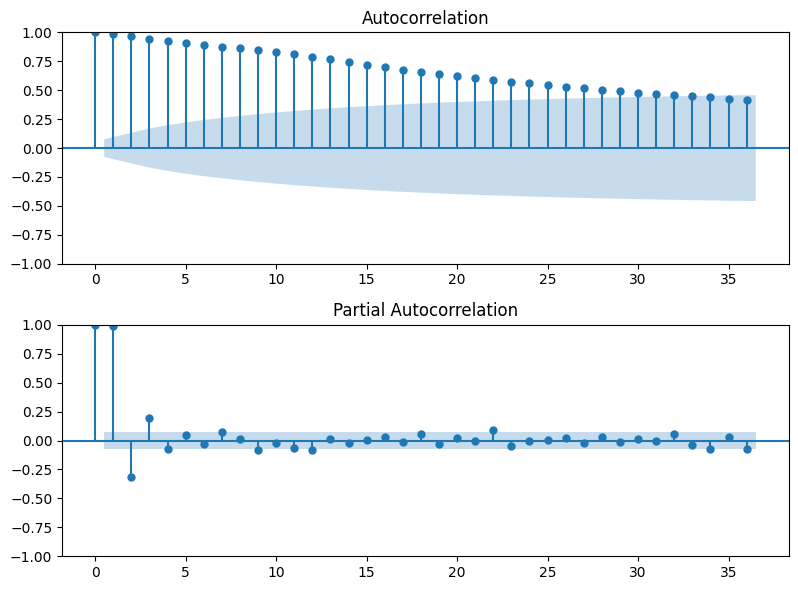

In [46]:
width, height = 8, 3
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(data.t10yr_stat, ax=ax[0], lags = seasonal_periods*3)
plot_pacf(data.t10yr_stat, ax=ax[1], method='ols', lags = seasonal_periods*3)

plt.tight_layout()
plt.show()

# Target

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/var/folders/f6/7fg5p95n44sd8qk792nr68d40000gn/T/ipykernel_69913/1278001474.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '1970'),
 Text(1, 0, '1971'),
 Text(2, 0, '1972'),
 Text(3, 0, '1973'),
 Text(4, 0, '1974'),
 Text(5, 0, '1975'),
 Text(6, 0, '1976'),
 Text(7, 0, '1977'),
 Text(8, 0, '1978'),
 Text(9, 0, '1979'),
 Text(10, 0, '1980'),
 Text(11, 0, '1981'),
 Text(12, 0, '1982'),
 Text(13, 0, '1983'),
 Text(14, 0, '1984'),
 Text(15, 0, '1985'),
 Text(16, 0, '1986'),
 Text(17, 0, '1987'),
 Text(18, 0, '1988'),
 Text(19, 0, '1989'),
 Text(20, 0, '1990'),
 Text(21, 0, '1991'),
 Text(22, 0, '1992'),
 Text(23, 0, '1993'),
 Text(24, 0, '1994'),
 Text(25, 0, '1995'),
 Text(26, 0, '1996'),
 Text(27, 0, '1997'),
 Text(28, 0, '1998'),
 Text(29, 0, '1999'),
 Text(30, 0, '2000'),
 Text(31, 0, '2001'),
 Text(32, 0, '2002'),
 Text(33, 0, '2003'),
 Text(34, 0, '2004'),
 Text(35, 0, '2005'),
 Text(36, 0, '2006'),
 Text(37, 0, '2007'),
 Text(38, 0, '2008'),
 Text(39, 0, '2009'),
 Text(40, 0, '2010'),
 Text(41, 0, '2011'),
 Text(42, 0, '2012'),
 Text(43, 0, '2013'),
 Text(44, 0, '2014'),
 Text(45, 0, '2015')

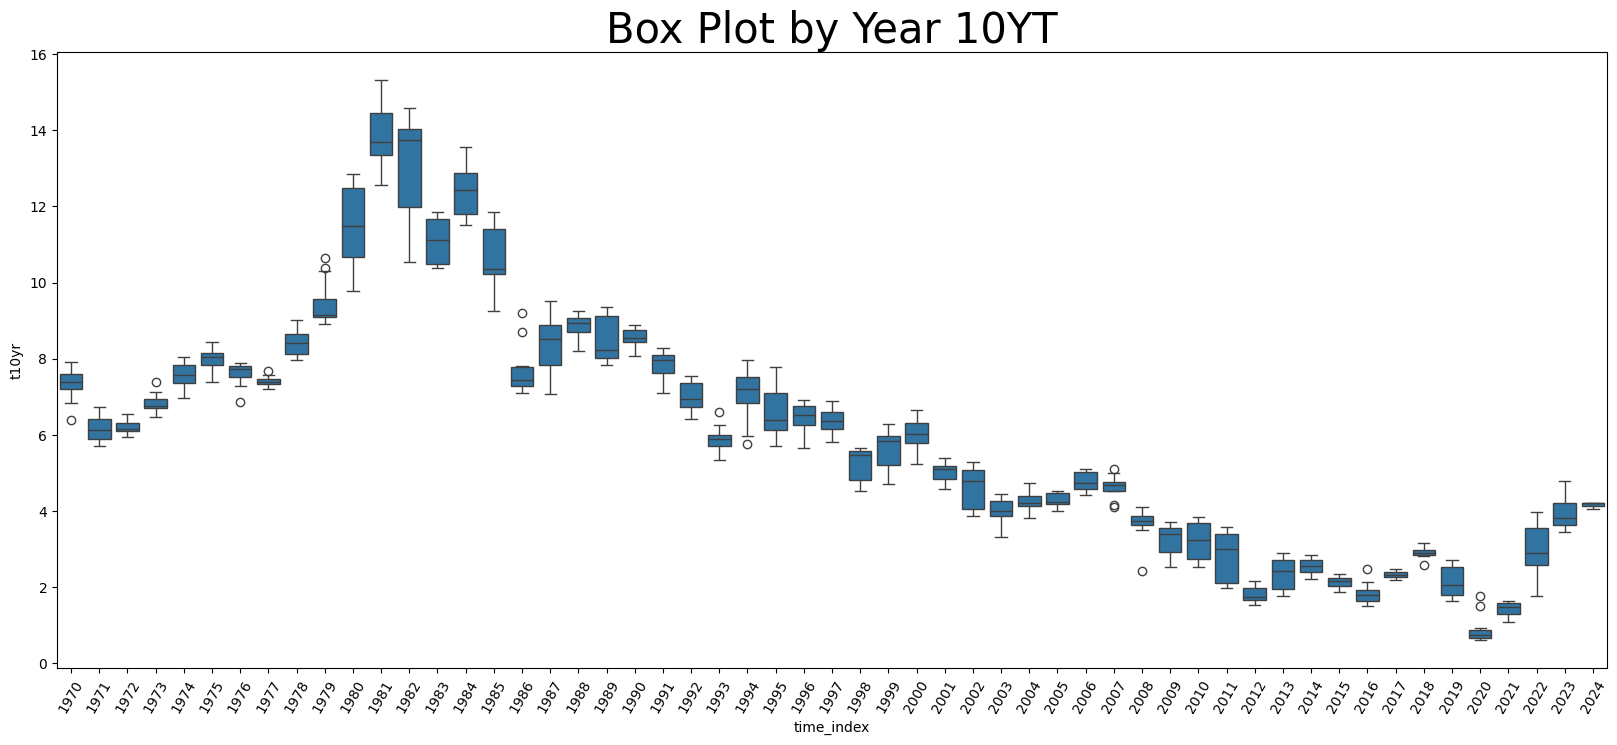

In [47]:
# box plot of monthly average 10YT
plt.figure(figsize=(20,8))
ax = sns.boxplot(x=data.index.year, y=data['t10yr'])
ax.set_title('Box Plot by Year 10YT',fontsize=30)
ticks = ax.get_xticklabels()
ax.set_xticklabels(ticks, rotation=60)

<Axes: >

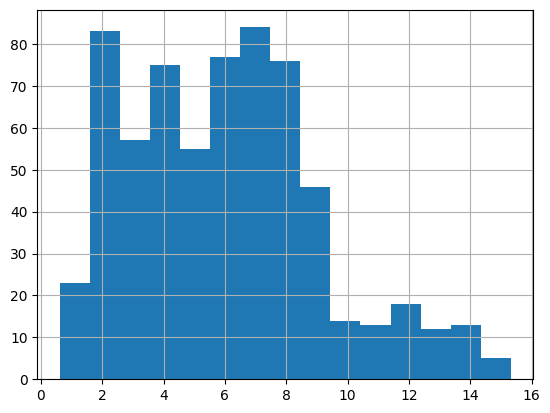

In [48]:
data.t10yr.hist(bins=15)

In [49]:
data.t10yr.describe()

count   651.00
mean      6.02
std       3.13
min       0.62
25%       3.56
50%       5.97
75%       7.87
max      15.32
Name: t10yr, dtype: float64

# Features 

In [50]:
features = data.columns[1:-2]

array([[<Axes: title={'center': 'cpi'}>,
        <Axes: title={'center': 'unemp'}>],
       [<Axes: title={'center': 'ppi'}>,
        <Axes: title={'center': 'saving'}>]], dtype=object)

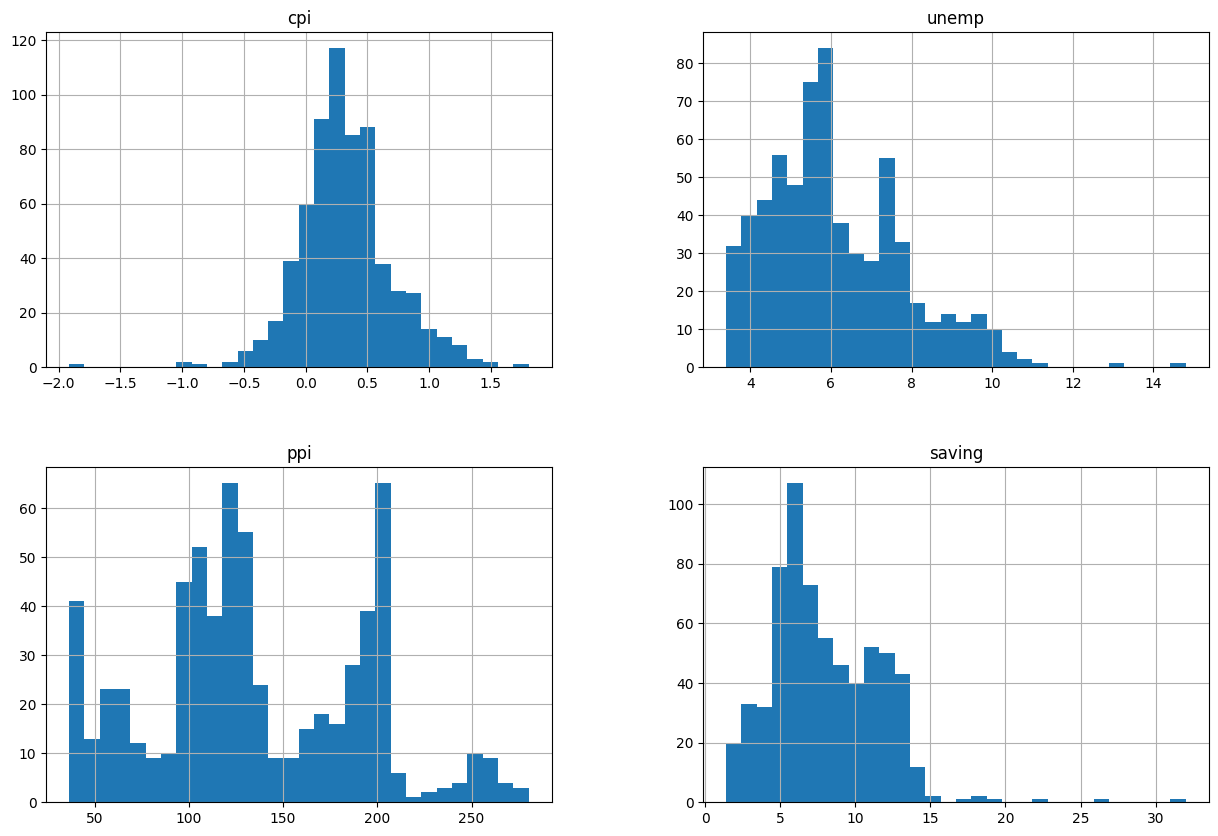

In [51]:
# distributions
data[features].hist(bins=30, figsize=(15, 10))

In [52]:
# scale continous features 
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

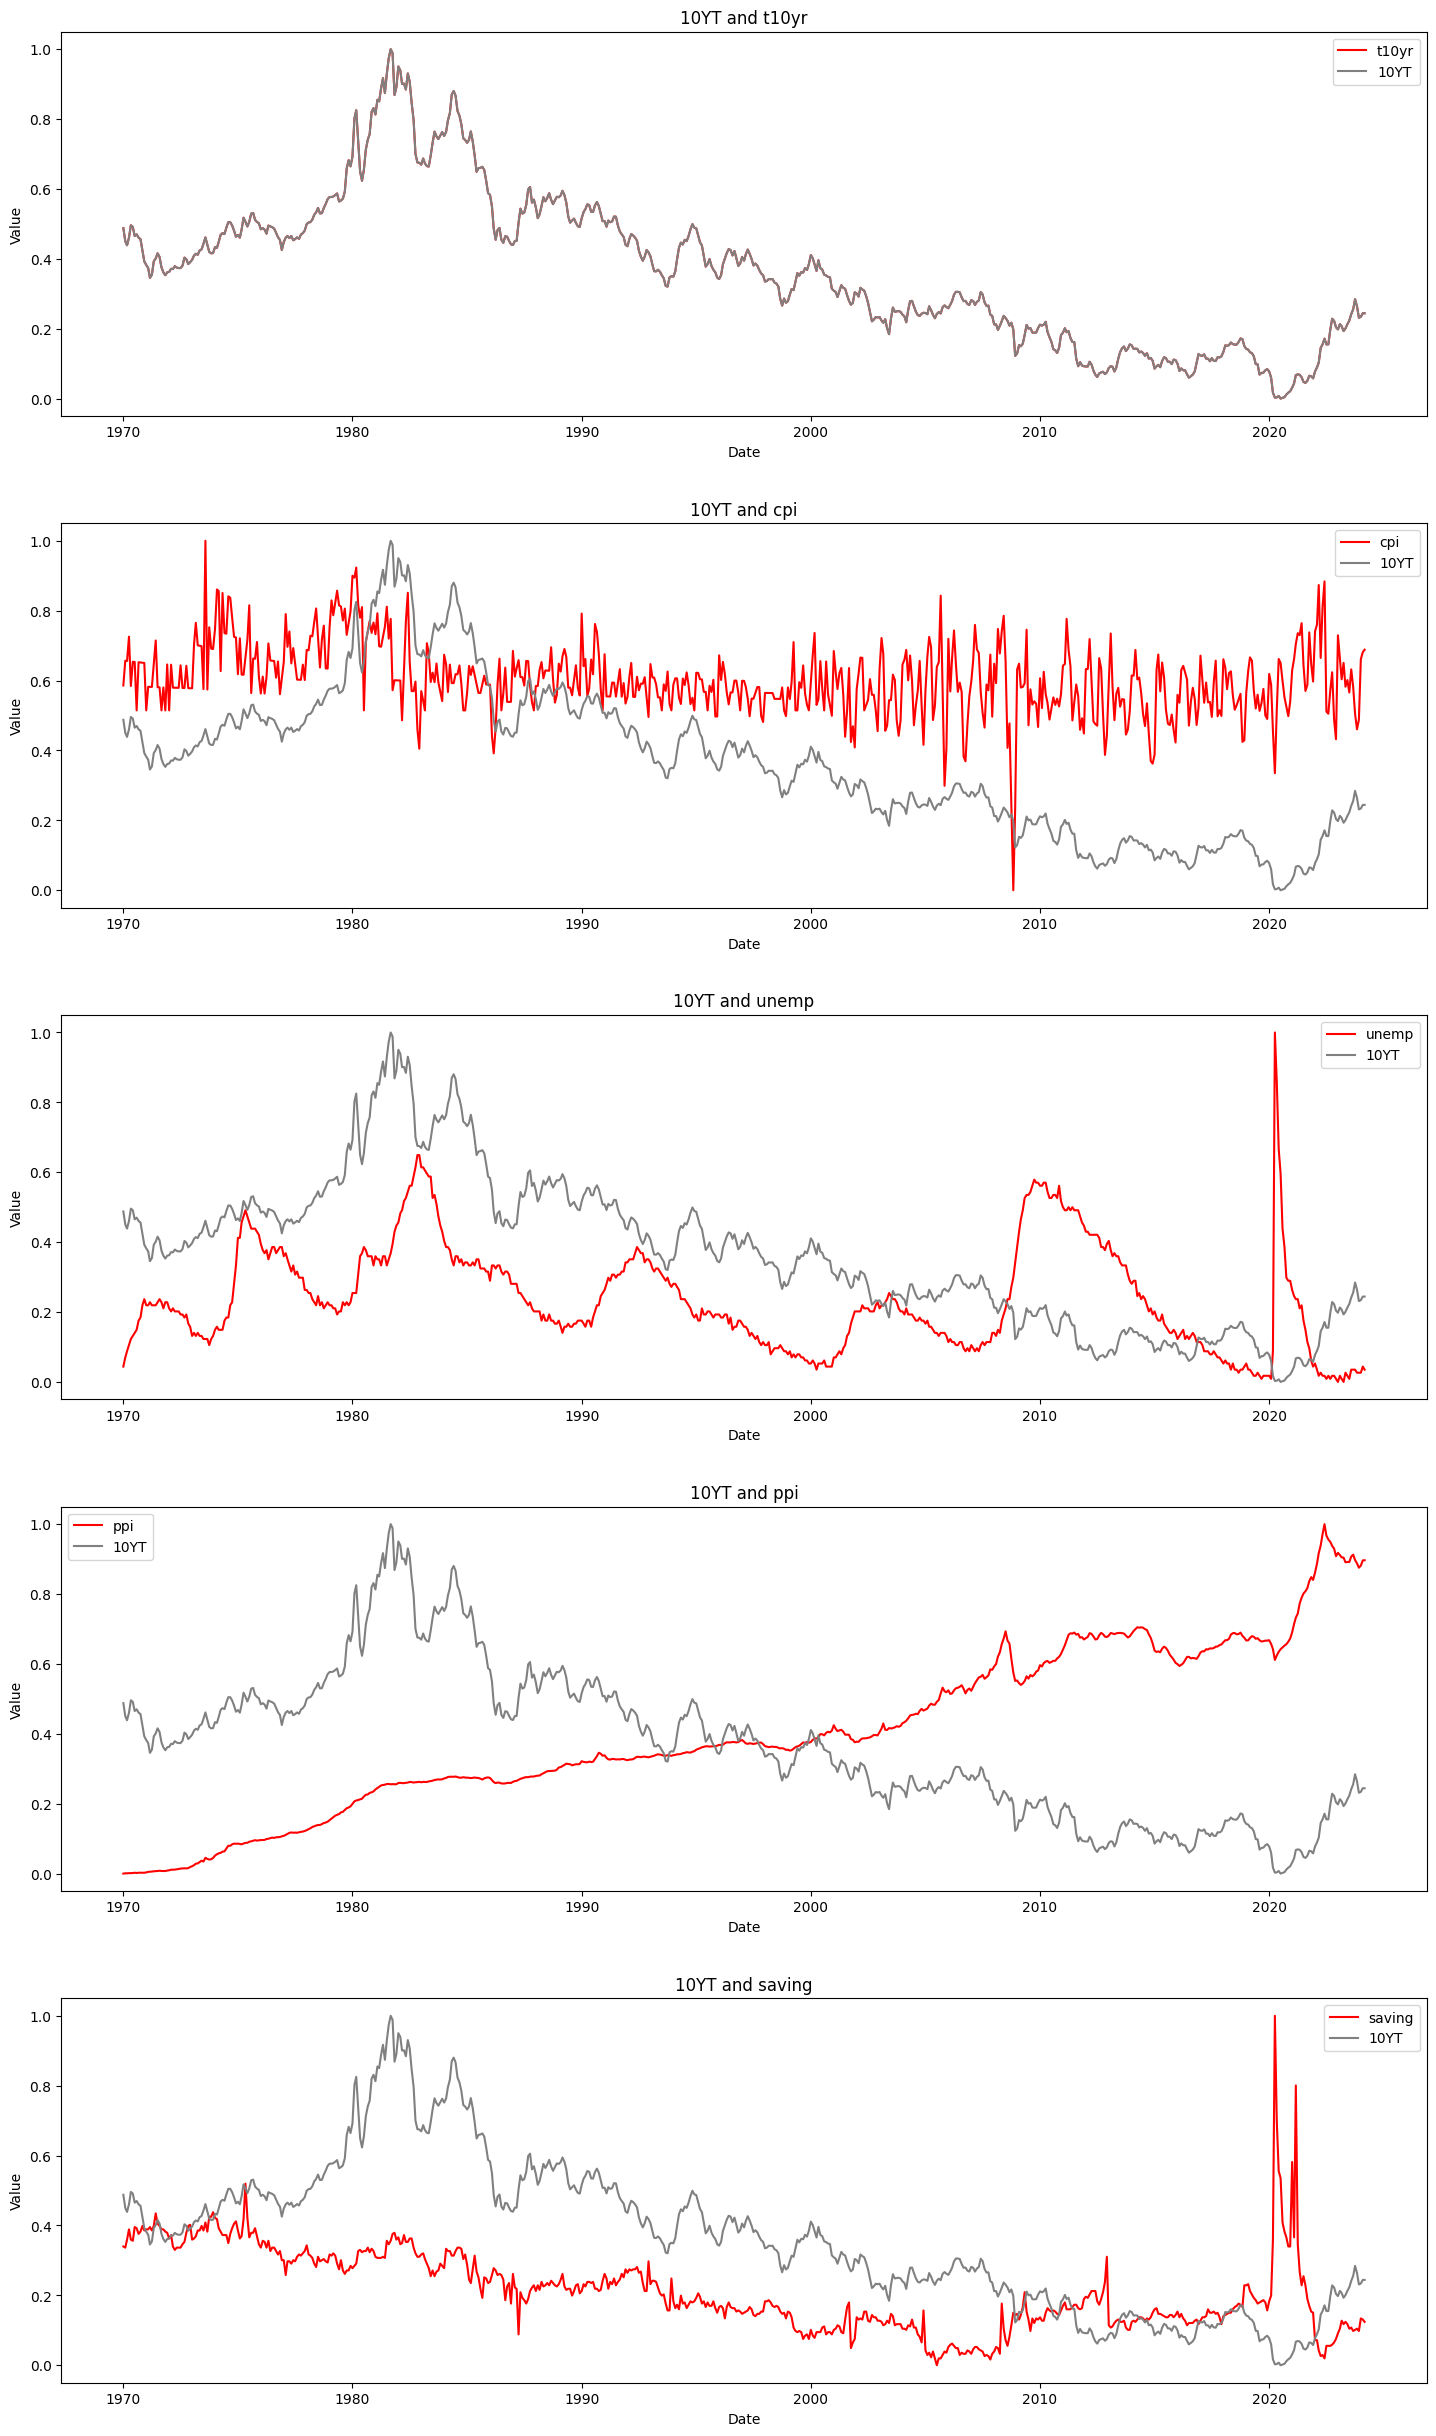

In [53]:
# compare 10YT and features
num_vars = len(features) + 1
col_names = data.columns
scaled_features = data_scaled
fig = plt.figure(figsize=(15, 25))
for i in range(num_vars):
  ax = fig.add_subplot(num_vars,1,i+1)
  ax.plot(data.index, scaled_features[:,i], label=col_names[i], c='red')
  ax.plot(data.index, data_scaled[:,0], label='10YT', c='grey')
  ax.set_title('10YT and ' + col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Value')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

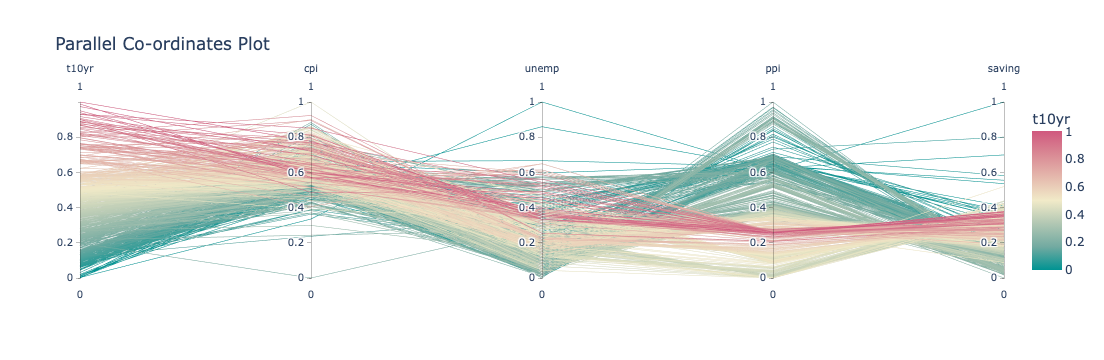

In [54]:
# parallel co-ordinates plots 
data_scaled = pd.DataFrame(data_scaled, columns=col_names).drop(['month', 't10yr_stat'], axis=1)

fig = px.parallel_coordinates(data_scaled, color='t10yr',color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Co-ordinates Plot')

fig.show()

Text(0.5, 1.0, 'Heatmap Spearman Correlation')

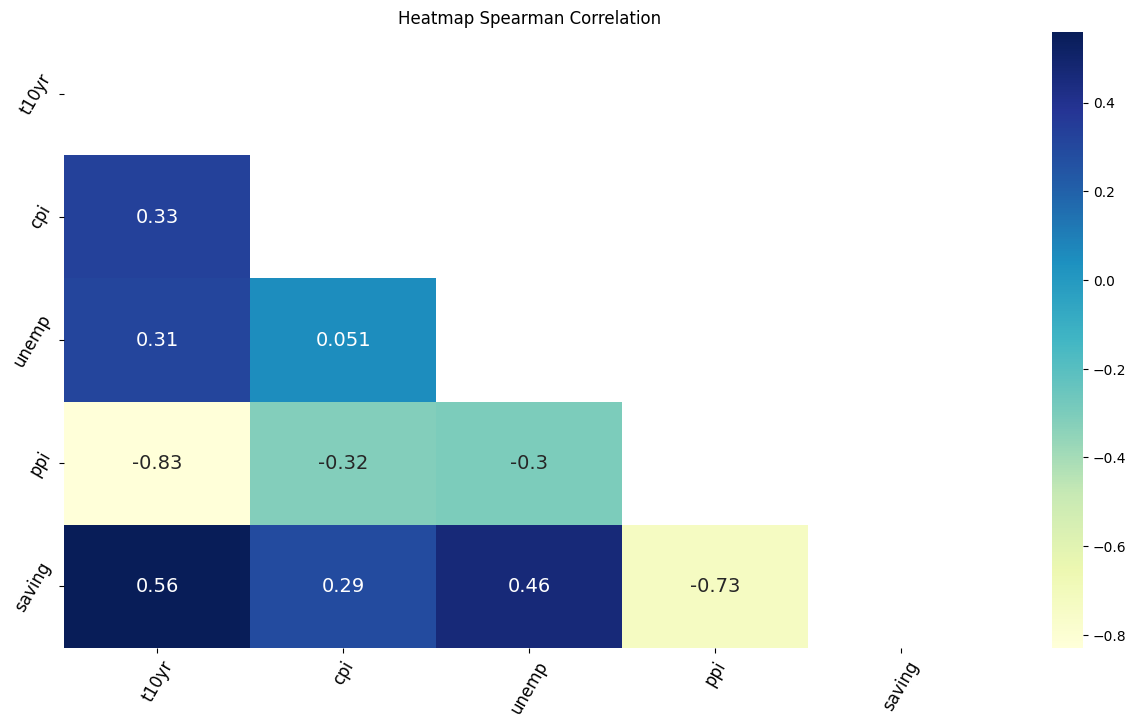

In [55]:
plt.figure(figsize=(15,8))
matrix = np.triu(data_scaled.corr(method='spearman'))
heat_map = sns.heatmap(data_scaled.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')